In [1]:
# importing modules
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"E:\Academics\Semester-6\DS 203(Prog. for DS)\Project\Session-Summary-for-E6-project.xlsx")
df.head()
print(df.shape)

(668, 2)


In [3]:
# Remove rows where 'Session_Summary' contains 'https'
df = df[~df['Session_Summary'].str.contains('https', na=False)]

# Display the first few rows of the updated DataFrame
df.head()
print(df.shape)


(667, 2)


In [4]:
# Function to fix encoding issues
def fix_encoding(text):
    if isinstance(text, str):
        # Replace the problematic sequence with a proper apostrophe
        return text.replace('â€™', "'")
    return text

# Apply the fix to the Session_Summary column
df['Session_Summary'] = df['Session_Summary'].apply(fix_encoding)


In [5]:
# Function to remove 'â€' from a string
def remove_special_chars(text):
    if isinstance(text, str):
        return text.replace('â€', '')
    return text

# Apply the function to 'Session_Summary' column
df['Session_Summary'] = df['Session_Summary'].apply(remove_special_chars)

In [6]:
# Check for null elements in the DataFrame
null_elements = df.isnull().sum()

# Print the number of null elements in each column
print(null_elements)

# Check if there are any null elements in the entire DataFrame
has_null = df.isnull().values.any()

print(f"DataFrame contains null values: {has_null}")

SerialNo           0
Session_Summary    0
dtype: int64
DataFrame contains null values: False


In [7]:
# Find all duplicates (including first occurrences)
all_duplicates = df.duplicated(subset='Session_Summary', keep=False)

# Print the number of rows involved in duplication
print(f"Number of rows involved in duplication: {all_duplicates.sum()}")

# Get the indices of duplicate rows
duplicate_indices = df[all_duplicates].index.tolist()
print(f"\nIndices of all rows involved in duplication: {duplicate_indices}")

# Group duplicates by their content
duplicate_groups = df[all_duplicates].groupby('Session_Summary').apply(lambda x: list(x.index))
print("\nDuplicate groups with their indices:")
for content, indices in duplicate_groups.items():
    if len(indices) > 1:  # Only show if there are actual duplicates
        print(f"\nIndices: {indices}")
        print(f"Content: {content[:100]}..." if len(content) > 100 else f"Content: {content}")
        print("-" * 50)

# If you want to remove duplicates:
df_no_duplicates = df.drop_duplicates(subset='Session_Summary', keep='first')

# Print the number of rows before and after removing duplicates
print(f"\nRows before removing duplicates: {len(df)}")
print(f"Rows after removing duplicates: {len(df_no_duplicates)}")


Number of rows involved in duplication: 2

Indices of all rows involved in duplication: [301, 485]

Duplicate groups with their indices:

Indices: [301, 485]
Content: we started by discussing the meaning of statistical significance. we discussed that if our value of ...
--------------------------------------------------

Rows before removing duplicates: 667
Rows after removing duplicates: 666


C:\Users\pradh\AppData\Local\Temp\ipykernel_8664\2432326974.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  duplicate_groups = df[all_duplicates].groupby('Session_Summary').apply(lambda x: list(x.index))


In [8]:
df.drop(['SerialNo'], axis= 1, inplace=True)
df.head()

,Session_Summary
0,we started our lecture with a recap of previou...
1,"in this session, we explored various feature e..."
2,population and sample were further discussed u...
3,we first looked at all the summaries and obser...
4,midsem metrics for evaluation and also discuss...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 667 entries, 0 to 667
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Session_Summary  667 non-null    object
dtypes: object(1)
memory usage: 10.4+ KB


In [10]:
# Function to clean, tokenize, and remove single-number tokens
def clean_and_tokenize(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    return [token for token in tokens if not token.isdigit()]  # Remove single-number tokens

# Apply to DataFrame
df['tokens'] = df['Session_Summary'].apply(clean_and_tokenize)


In [11]:
# Create a new column with the number of tokens (word count)
df['words_count'] = df['tokens'].apply(len)

df

,Session_Summary,tokens,words_count
0,we started our lecture with a recap of previou...,"[we, started, our, lecture, with, a, recap, of...",224
1,"in this session, we explored various feature e...","[in, this, session, we, explored, various, fea...",271
2,population and sample were further discussed u...,"[population, and, sample, were, further, discu...",336
3,we first looked at all the summaries and obser...,"[we, first, looked, at, all, the, summaries, a...",219
4,midsem metrics for evaluation and also discuss...,"[midsem, metrics, for, evaluation, and, also, ...",13
...,...,...,...
663,in this lecture we have learnt about what is p...,"[in, this, lecture, we, have, learnt, about, w...",326
664,"today, we continued our discussion on statisti...","[today, we, continued, our, discussion, on, st...",97
665,"at the beginning, sir explained what are the w...","[at, the, beginning, sir, explained, what, are...",231
666,we studied about crisp-dm\n(cross industry sta...,"[we, studied, about, crispdm, cross, industry,...",106


In [12]:
df['words_count'].describe()

count     667.000000
mean      206.695652
std       144.009213
min         4.000000
25%       111.000000
50%       172.000000
75%       262.500000
max      1375.000000
Name: words_count, dtype: float64

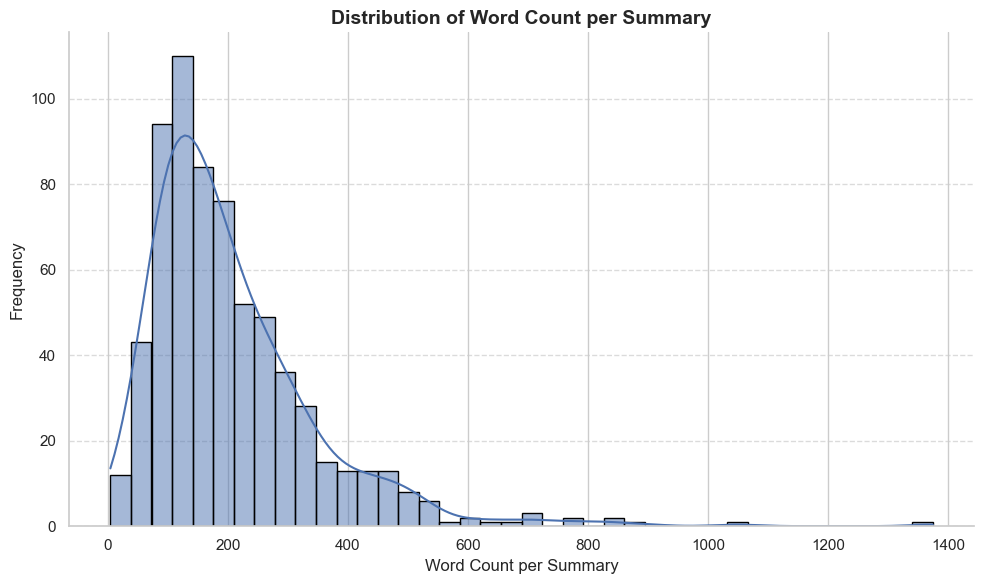

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df['words_count'], bins=40, kde=True, edgecolor='black', linewidth=1)
# Customize labels and title
plt.xlabel('Word Count per Summary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Word Count per Summary', fontsize=14, weight='bold')

# Remove top and right spines
sns.despine()

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for clean spacing
plt.tight_layout()

plt.show()


In [14]:
# Modified function to split text into sentences and exclude short sentences
def split_into_sentences(text):
    sentences = re.split(r'[.!?]+', text)  # Split at ., !, ?
    sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty strings
    # Exclude sentences with 1 to 3 words
    sentences = [s for s in sentences if len(s.split()) > 3]
    return sentences

# Apply modified function to create 'sentences' column
df['sentences'] = df['Session_Summary'].apply(split_into_sentences)

# Create a new column for the sentence count
df['sentence_count'] = df['sentences'].apply(len)


In [15]:
# Function to count words in each sentence
def count_words_in_sentences(sentences):
    return [len(sentence.split()) for sentence in sentences]

# Apply function to create a new column
df['words_per_sentence'] = df['sentences'].apply(count_words_in_sentences)
df.head()

,Session_Summary,tokens,words_count,sentences,sentence_count,words_per_sentence
0,we started our lecture with a recap of previou...,"[we, started, our, lecture, with, a, recap, of...",224,[we started our lecture with a recap of previo...,16,"[22, 11, 14, 16, 12, 14, 9, 37, 15, 14, 8, 16,..."
1,"in this session, we explored various feature e...","[in, this, session, we, explored, various, fea...",271,"[in this session, we explored various feature ...",16,"[24, 7, 14, 15, 26, 8, 10, 18, 23, 17, 20, 11,..."
2,population and sample were further discussed u...,"[population, and, sample, were, further, discu...",336,[population and sample were further discussed ...,22,"[7, 10, 7, 11, 9, 14, 7, 9, 11, 18, 12, 12, 37..."
3,we first looked at all the summaries and obser...,"[we, first, looked, at, all, the, summaries, a...",219,[we first looked at all the summaries and obse...,13,"[37, 24, 5, 6, 8, 29, 29, 20, 9, 19, 14, 15, 9]"
4,midsem metrics for evaluation and also discuss...,"[midsem, metrics, for, evaluation, and, also, ...",13,[midsem metrics for evaluation and also discus...,1,[13]


In [16]:
# Flatten the list of word counts into a single list
flattened_list = [word_count for sublist in df['words_per_sentence'] for word_count in sublist]

In [17]:
# Alternative: Create a Series and use describe()
word_counts_series = pd.Series(flattened_list)
word_counts_series.describe()


count    7975.000000
mean       17.577179
std        10.519681
min         4.000000
25%        11.000000
50%        16.000000
75%        22.000000
max       154.000000
dtype: float64

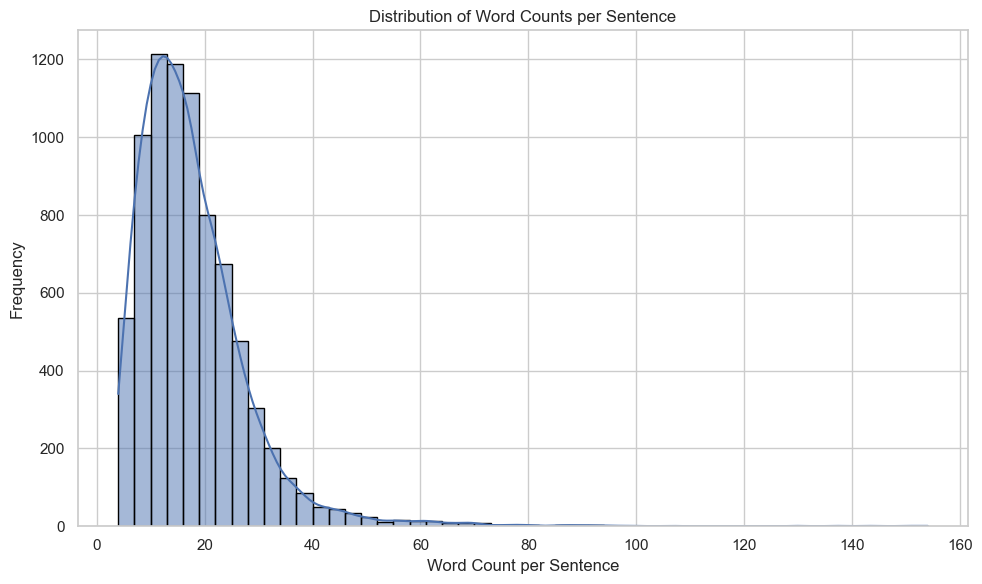

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=word_counts_series, bins=50, kde=True, edgecolor='black', linewidth=1)

plt.xlabel('Word Count per Sentence')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts per Sentence')

plt.tight_layout()
plt.show()

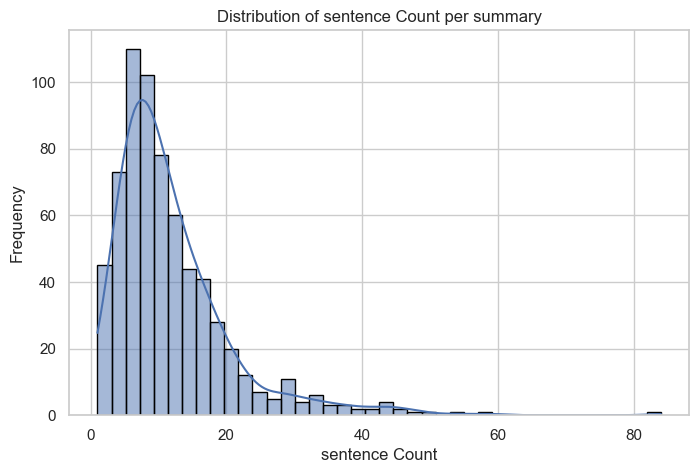

In [31]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df['sentence_count'], bins=40, kde=True, edgecolor='black', linewidth=1)

# Labels and title
plt.xlabel('sentence Count')
plt.ylabel('Frequency')
plt.title('Distribution of sentence Count per summary')

# Show the plot
plt.show()

In [20]:
df['sentence_count'].describe()

count    667.000000
mean      11.956522
std        8.895434
min        1.000000
25%        6.000000
50%       10.000000
75%       15.000000
max       84.000000
Name: sentence_count, dtype: float64

In [21]:
df[df['sentence_count']<=3].head()

,Session_Summary,tokens,words_count,sentences,sentence_count,words_per_sentence
4,midsem metrics for evaluation and also discuss...,"[midsem, metrics, for, evaluation, and, also, ...",13,[midsem metrics for evaluation and also discus...,1,[13]
23,we learnt about parameter / statistics\nalso a...,"[we, learnt, about, parameter, statistics, als...",62,[we learnt about parameter / statistics\nalso ...,1,[63]
24,started with confidence interval. learnt more ...,"[started, with, confidence, interval, learnt, ...",12,"[started with confidence interval, learnt more...",2,"[4, 8]"
26,we started the class with a thorough discussio...,"[we, started, the, class, with, a, thorough, d...",66,[we started the class with a thorough discussi...,3,"[23, 26, 20]"
28,we began by using pivot tables in excel to com...,"[we, began, by, using, pivot, tables, in, exce...",96,[we began by using pivot tables in excel to co...,2,"[29, 68]"


In [22]:
df[df['sentence_count']<=3].shape

(45, 6)

In [23]:
df.head()

,Session_Summary,tokens,words_count,sentences,sentence_count,words_per_sentence
0,we started our lecture with a recap of previou...,"[we, started, our, lecture, with, a, recap, of...",224,[we started our lecture with a recap of previo...,16,"[22, 11, 14, 16, 12, 14, 9, 37, 15, 14, 8, 16,..."
1,"in this session, we explored various feature e...","[in, this, session, we, explored, various, fea...",271,"[in this session, we explored various feature ...",16,"[24, 7, 14, 15, 26, 8, 10, 18, 23, 17, 20, 11,..."
2,population and sample were further discussed u...,"[population, and, sample, were, further, discu...",336,[population and sample were further discussed ...,22,"[7, 10, 7, 11, 9, 14, 7, 9, 11, 18, 12, 12, 37..."
3,we first looked at all the summaries and obser...,"[we, first, looked, at, all, the, summaries, a...",219,[we first looked at all the summaries and obse...,13,"[37, 24, 5, 6, 8, 29, 29, 20, 9, 19, 14, 15, 9]"
4,midsem metrics for evaluation and also discuss...,"[midsem, metrics, for, evaluation, and, also, ...",13,[midsem metrics for evaluation and also discus...,1,[13]


### Analysing the tokenization

In [24]:
df['tokens'].iloc[0]

['we',
 'started',
 'our',
 'lecture',
 'with',
 'a',
 'recap',
 'of',
 'previous',
 'lecture',
 'particularly',
 'about',
 'the',
 'difference',
 'between',
 'statistically',
 'similar',
 'values',
 'and',
 'statistically',
 'significant',
 'values',
 'we',
 'then',
 'started',
 'a',
 'new',
 'topic',
 'called',
 'as',
 'multiple',
 'linear',
 'regression',
 'as',
 'the',
 'name',
 'suggests',
 'it',
 'is',
 'a',
 'linear',
 'regression',
 'but',
 'dependent',
 'upon',
 'multiple',
 'features',
 'we',
 'looked',
 'how',
 'things',
 'like',
 'sales',
 'depend',
 'on',
 'multiple',
 'factors',
 'like',
 'age',
 'earning',
 'family',
 'size',
 'etc',
 'the',
 'things',
 'on',
 'which',
 'our',
 'y',
 'is',
 'dependent',
 'are',
 'known',
 'as',
 'features',
 'our',
 'goal',
 'is',
 'to',
 'represent',
 'y',
 'as',
 'a',
 'linear',
 'combination',
 'of',
 'x1',
 'x2',
 'x3',
 'xn',
 'suppose',
 'y',
 'b0',
 'b1x1',
 'b2x2',
 'our',
 'objective',
 'is',
 'to',
 'find',
 'the',
 'values',
 

In [25]:
print(df.columns.tolist())

['Session_Summary', 'tokens', 'words_count', 'sentences', 'sentence_count', 'words_per_sentence']


In [26]:
# exporting csv file for vectorization
df_export = df[['Session_Summary','tokens','words_count', 'sentence_count']]

df_export.to_csv('processed_df.csv', index=False)
